# Can We Predict Political Stability Through Use of Global Sustainability Goal Indicators? 

In 2015, all UN Member States developed a set of 17 Global Sustainability Goals to allow for peace and prosperity globally.  The set of goals include those to reduce poverity and inequality, improve health and education, increase economic growth, increase access to clean water and food, and do so in a manner that protects the land and oceans.  

Climate change induced floods and droughts, poverity, and lack of access to clean water and food all contribute to political tension and violence as people struggle to meet their basic needs.  The goal of this project is to see how well the country status of each sustainable development goal can be used to predict the political stability and absence of violence for each country. 

The Sustainability Goals data were obtained from World Bank:https://api.worldbank.org/v2/sources/46/indicators
Documentation on the Sustainability Goals can be found here: https://datatopics.worldbank.org/sdgatlas/
The Worldwide Governance Indicators data were obtaiend from World Bank: https://datacatalog.worldbank.org/dataset/worldwide-governance-indicators.  Details on the selected variables from each dataset can be found below. 



## Get Response Variable: Political Stability and Absence of Violence/Terrorism

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import datetime
import wbdata
import plotly.express as px
import plotly.io as pio
import requests

In [44]:
# Requesting the indicators for the topic Political Stability.  The 3 is the key for the Political Stability Data.
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=3")
indicatorsJSON = indicators.json()

In [45]:
# Get all Worldwide Governance indicators so we know what is available
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=3&per_page=500")
indicatorsJSON = indicators.json()
#print(indicatorsJSON) # to view ALL of the indicators as is, remove the "#" at the beginning of the print command

# Parse through the response to see the Indicator IDs and Names
for i in indicatorsJSON[1]:
    IDSindicators = (i["id"],i["name"])
    print(IDSindicators) # to view the indicator ids and names, remove the "#" at the beginning of the print command

('CC.EST', 'Control of Corruption: Estimate')
('CC.NO.SRC', 'Control of Corruption: Number of Sources')
('CC.PER.RNK', 'Control of Corruption: Percentile Rank')
('CC.PER.RNK.LOWER', 'Control of Corruption: Percentile Rank, Lower Bound of 90% Confidence Interval')
('CC.PER.RNK.UPPER', 'Control of Corruption: Percentile Rank, Upper Bound of 90% Confidence Interval')
('CC.STD.ERR', 'Control of Corruption: Standard Error')
('GE.EST', 'Government Effectiveness: Estimate')
('GE.NO.SRC', 'Government Effectiveness: Number of Sources')
('GE.PER.RNK', 'Government Effectiveness: Percentile Rank')
('GE.PER.RNK.LOWER', 'Government Effectiveness: Percentile Rank, Lower Bound of 90% Confidence Interval')
('GE.PER.RNK.UPPER', 'Government Effectiveness: Percentile Rank, Upper Bound of 90% Confidence Interval')
('GE.STD.ERR', 'Government Effectiveness: Standard Error')
('PV.EST', 'Political Stability and Absence of Violence/Terrorism: Estimate')
('PV.NO.SRC', 'Political Stability and Absence of Violence

In [46]:
# Use the indicator code to define the "indicator" variable.  We can change this to get information on each of the indicators.
indicator = "PV.EST"

# Parse through the response to get the "sourceNote" or definition for the desired indicator
for dict_entity in indicatorsJSON[1]:
    if dict_entity["id"] == indicator:
        print(dict_entity["sourceNote"])
    else:
        pass

Political Stability and Absence of Violence/Terrorism measures perceptions of the likelihood of political instability and/or politically-motivated violence, including terrorism. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.


In [47]:
#Get a list of all the location abbreviations so we know what they are for limiting selections.
dlocations = requests.get("http://api.worldbank.org/v2/sources/3/country?per_page=300&format=JSON")
dlocationsJSON = dlocations.json()

# Parse through the response to see the location IDs and names
dlocations = dlocationsJSON["source"][0]["concept"][0]["variable"]
listLen = int(len(dlocations))

# Create dataframe with location values
df = pd.DataFrame(columns=["id", "country"])     
for i in range(0,listLen):
    code = dlocations[i]["id"]
    name = dlocations[i]["value"]
    df = df.append({"id":code, "country":name}, ignore_index = True)
dlocationsList = df

# See first few items in the dataframe
dlocationsList.head()

,id,country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALB,Albania


In [48]:
#Select the indicator, location, and time you would like for the API call
# Selecting the indicator
indicatorSelection = {'PV.EST':'Political Stability and Absence of Violence/Terrorism: Estimate'}
# Select the countries or regions
locationSelection = ["all"]
# Selecting the time frame
timeSelection = (datetime.datetime(2010, 1, 1), datetime.datetime(2020, 12, 31))
#Set the source id number for the Worldwide Governance Data
source_id=3

In [50]:
# Make the API call and assign the resulting DataFrame to "PT_data"
#Notes from wbdata: 
"""
    Convenience function to download a set of indicators and  merge them into a
        pandas DataFrame.  The index will be the same as if calls were made to
        get_data separately.
    :indicators: An dictionary where the keys are desired indicators and the
        values are the desired column names
    :country: a country code, sequence of country codes, or "all" (default)
    :data_date: the desired date as a datetime object or a 2-sequence with
        start and end dates
    :freq: the desired periodicity of the data, one of 'Y' (yearly), 'M'
        (monthly), or 'Q' (quarterly). The indicator may or may not support the
        specified frequency.
    :source: the specific source to retrieve data from (defaults on API to 2,
        World Development Indicators)
    :convert_date: if True, convert date field to a datetime.datetime object.
    :keep_levels: if True don't reduce the number of index levels returned if
        only getting one date or country
    :cache: use the cache
    :returns: a WBDataFrame
    """
PT_data = wbdata.get_dataframe(indicatorSelection,
                            source=source_id,
                            country = locationSelection, 
                            data_date = timeSelection, 
                            convert_date = False)

In [55]:
PT_data.head()

Political Stability and Absence of Violence/Terrorism: Estimate
country     date                                                                 
Afghanistan 2019                                          -2.649407              
            2018                                          -2.751611              
            2017                                          -2.800609              
            2016                                          -2.671054              
            2015                                          -2.571222

In [56]:
# Turn multiindex into columns
PT_data.reset_index(inplace=True)  
PT_data.head()

,country,date,Political Stability and Absence of Violence/Terrorism: Estimate
0,Afghanistan,2019,-2.649407
1,Afghanistan,2018,-2.751611
2,Afghanistan,2017,-2.800609
3,Afghanistan,2016,-2.671054
4,Afghanistan,2015,-2.571222


In [57]:
#Merge Political Stability data with dlocationsList to get the ISO code for each country
PT_data_with_loc = pd.merge(dlocationsList, PT_data, on='country')
PT_data_with_loc.head(-1)

,id,country,date,Political Stability and Absence of Violence/Terrorism: Estimate
0,ABW,Aruba,2019,1.357372
1,ABW,Aruba,2018,1.362981
2,ABW,Aruba,2017,1.334757
3,ABW,Aruba,2016,1.284199
4,ABW,Aruba,2015,1.230921
...,...,...,...,...
2134,ZWE,Zimbabwe,2015,-0.618156
2135,ZWE,Zimbabwe,2014,-0.713570
2136,ZWE,Zimbabwe,2013,-0.665950
2137,ZWE,Zimbabwe,2012,-0.778662


In [58]:
#make fucntion to get lat and lon of each country for plotting from country code

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="http")

def get_lat(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.latitude
    except:
        # Return missing value
        return np.nan
    
def get_lon(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.longitude
    except:
        # Return missing value
        return np.nan

In [61]:
# Remove countries with no Political tension data
PT_data_with_loc.dropna(axis=0, inplace=True)
PT_data_with_loc.head()

,id,country,date,Political Stability and Absence of Violence/Terrorism: Estimate
0,ABW,Aruba,2019,1.357372
1,ABW,Aruba,2018,1.362981
2,ABW,Aruba,2017,1.334757
3,ABW,Aruba,2016,1.284199
4,ABW,Aruba,2015,1.230921


In [60]:
#get length of the dataset
len(PT_data_with_loc)

2114

In [62]:
# Make a new dataframe storing the country name, country code, lat and lon for each country to use with other datasets
country_data = PT_data_with_loc.drop('Political Stability and Absence of Violence/Terrorism: Estimate', axis=1)
country_df = country_data.drop('date', axis=1)
country_df.drop_duplicates(['country'], inplace=True)

In [63]:
len(country_df)

214

In [64]:
#Get Lat lon of each country based on id using function above.

country_df['lat'] = country_df.apply(lambda row : get_lat(row['country']), axis=1)
country_df['lon'] = country_df.apply(lambda row : get_lon(row['country']), axis=1)

country_df.head()

,id,country,lat,lon
0,ABW,Aruba,12.490300,-69.960984
10,AFG,Afghanistan,33.768006,66.238514
20,AGO,Angola,-11.877577,17.569124
30,AIA,Anguilla,18.195495,-63.075023
40,ALB,Albania,41.000028,19.999962


In [65]:
#Remove any countries with nan values for lat or lon
country_df.dropna(axis=0, inplace=True)
country_df.head()

,id,country,lat,lon
0,ABW,Aruba,12.490300,-69.960984
10,AFG,Afghanistan,33.768006,66.238514
20,AGO,Angola,-11.877577,17.569124
30,AIA,Anguilla,18.195495,-63.075023
40,ALB,Albania,41.000028,19.999962


In [66]:
#merge country_df and co2_data now that we have lat lon for each country
PT_new_df = pd.merge(PT_data_with_loc, country_df, on='country')
PT_new_df.head()

,id_x,country,date,Political Stability and Absence of Violence/Terrorism: Estimate,id_y,lat,lon
0,ABW,Aruba,2019,1.357372,ABW,12.4903,-69.960984
1,ABW,Aruba,2018,1.362981,ABW,12.4903,-69.960984
2,ABW,Aruba,2017,1.334757,ABW,12.4903,-69.960984
3,ABW,Aruba,2016,1.284199,ABW,12.4903,-69.960984
4,ABW,Aruba,2015,1.230921,ABW,12.4903,-69.960984


In [67]:
#remove extra id column
PT_new_df.drop('id_y', axis=1, inplace=True)
PT_new_df.head()

,id_x,country,date,Political Stability and Absence of Violence/Terrorism: Estimate,lat,lon
0,ABW,Aruba,2019,1.357372,12.4903,-69.960984
1,ABW,Aruba,2018,1.362981,12.4903,-69.960984
2,ABW,Aruba,2017,1.334757,12.4903,-69.960984
3,ABW,Aruba,2016,1.284199,12.4903,-69.960984
4,ABW,Aruba,2015,1.230921,12.4903,-69.960984


In [68]:
#Change df column names for easier processing
PT_new_df.rename(columns={"Political Stability and Absence of Violence/Terrorism: Estimate": "Political_Stability", "id_x": "id"}, inplace=True)
PT_new_df.head()

,id,country,date,Political_Stability,lat,lon
0,ABW,Aruba,2019,1.357372,12.4903,-69.960984
1,ABW,Aruba,2018,1.362981,12.4903,-69.960984
2,ABW,Aruba,2017,1.334757,12.4903,-69.960984
3,ABW,Aruba,2016,1.284199,12.4903,-69.960984
4,ABW,Aruba,2015,1.230921,12.4903,-69.960984


In [69]:
grouped_PT_df = PT_new_df.groupby('country').mean().reset_index()
grouped_PT_df[grouped_PT_df['country']=='United States']

,country,Political_Stability,lat,lon
196,United States,0.507555,39.78373,-100.445883


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


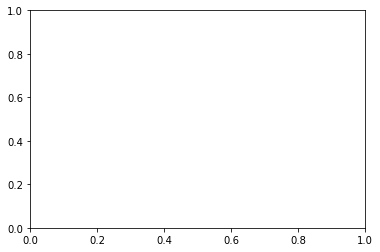

ValueError: need at least one array to concatenate

<Figure size 864x648 with 2 Axes>

In [73]:
import matplotlib.pyplot as plt

#plot political tension data on worldmap using geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
from shapely.geometry import Point, LineString

fig, ax = plt.subplots()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
grouped_PT_df.plot(ax=world.plot(figsize=(12,9)), kind="scatter", x="lon", y="lat",
    s=grouped_PT_df['Political_Stability'], label="Political Stability and Absence of Violence",
    c="Political_Stability", cmap='YlOrRd',
    colorbar=True, alpha=0.4)
plt.legend()
plt.show()

In [ ]:
#https://stackoverflow.com/questions/61460814/color-cartopy-map-countries-according-to-given-values

In [74]:
grouped_PT_df.sort_values('Political_Stability', ascending=False)

,country,Political_Stability,lat,lon
71,Greenland,1.903959,77.619235,-42.812597
105,Liechtenstein,1.480630,47.141631,9.553153
132,New Zealand,1.457606,-41.500083,172.834408
91,"Jersey, Channel Islands",1.399630,49.185217,-2.109048
163,Singapore,1.374209,1.290475,103.852036
...,...,...,...,...
85,Iraq,-2.247403,33.095579,44.174978
179,Syrian Arab Republic,-2.490038,34.640186,39.049411
140,Pakistan,-2.504352,30.330840,71.247499
0,Afghanistan,-2.587409,33.768007,66.238514


(array([ 6.,  5.,  6., 21., 31., 31., 30., 42., 31.,  3.]),
 array([-2.5978937 , -2.14770847, -1.69752324, -1.24733801, -0.79715278,
        -0.34696755,  0.10321768,  0.55340291,  1.00358814,  1.45377337,
         1.9039586 ]),
 <BarContainer object of 10 artists>)

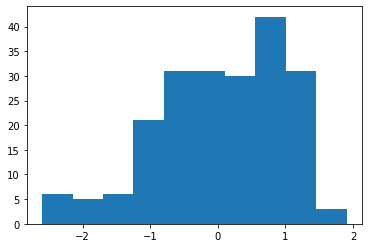

In [76]:
#Show a histogram of 5-year mean political stability. 
plt.hist(x="Political_Stability", data=grouped_PT_df)
plt.

# Get Predictor Variables from Sustainability Goals Dataset

In [36]:
# Requesting the indicators for the topic Political Stability.  The 46 is the key for the Political Stability Data.
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=46")
indicatorsJSON = indicators.json()

In [37]:
# Get all Sustainable Development Variables so we know what is available
indicators = requests.get("http://api.worldbank.org/v2/indicator?format=json&source=46&per_page=500")
indicatorsJSON = indicators.json()
#print(indicatorsJSON) # to view ALL of the indicators as is, remove the "#" at the beginning of the print command

# Parse through the response to see the Indicator IDs and Names
for i in indicatorsJSON[1]:
    IDSindicators = (i["id"],i["name"])
    print(IDSindicators) # to view the indicator ids and names, remove the "#" at the beginning of the print command

('AG.LND.FRST.K2', 'Forest area (sq. km)')
('AG.LND.FRST.ZS', 'Forest area (% of land area)')
('AG.YLD.CREL.KG', 'Cereal yield (kg per hectare)')
('BN.CAB.XOKA.GD.ZS', 'Current account balance (% of GDP)')
('BN.KLT.PTXL.CD', 'Portfolio Investment, net (BoP, current US$)')
('BX.KLT.DINV.CD.WD', 'Foreign direct investment, net inflows (BoP, current US$)')
('BX.KLT.DINV.WD.GD.ZS', 'Foreign direct investment, net inflows (% of GDP)')
('BX.TRF.PWKR.DT.GD.ZS', 'Personal remittances, received (% of GDP)')
('DT.DOD.DECT.GN.ZS', 'External debt stocks (% of GNI)')
('DT.ODA.ALLD.CD', 'Net official development assistance and official aid received (current US$)')
('DT.ODA.ODAT.CD', 'Net official development assistance received (current US$)')
('DT.ODA.ODAT.CD1', 'Net official development assistance received (current US$)')
('DT.ODA.ODAT.KD', 'Net official development assistance received (constant 2018 US$)')
('DT.TDS.DPPF.XP.ZS', 'Debt service (PPG and IMF only, % of exports of goods, services and 

In [39]:
# Use the indicator code to define the "indicator" variable.  We can change this to get information on each of the indicators.
indicator = "SH.SVR.WAST.FE.ZS"

# Parse through the response to get the "sourceNote" or definition for the desired indicator
for dict_entity in indicatorsJSON[1]:
    if dict_entity["id"] == indicator:
        print(dict_entity["sourceNote"])
    else:
        pass

Prevalence of severe wasting, female, is the proportion of girls under age 5 whose weight for height is more than three standard deviations below the median for the international reference population ages 0-59.


In [16]:
#Get a list of all the location abbreviations from the sustainable development dataset so we know what they are for limiting selections.
dlocations = requests.get("http://api.worldbank.org/v2/sources/46/country?per_page=300&format=JSON")
dlocationsJSON = dlocations.json()

# Parse through the response to see the location IDs and names
dlocations = dlocationsJSON["source"][0]["concept"][0]["variable"]
listLen = int(len(dlocations))

# Create dataframe with location values
df = pd.DataFrame(columns=["id", "country"])     
for i in range(0,listLen):
    code = dlocations[i]["id"]
    name = dlocations[i]["value"]
    df = df.append({"id":code, "country":name}, ignore_index = True)
dlocationsList = df

# See first few items in the dataframe
dlocationsList.head()

,id,country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,ALB,Albania
4,AND,Andorra


In [17]:
#Set a list of all the predictor variables that we want to use from the dataset. 
predictor_variables = []

In [41]:
#Select the indicator, location, and time you would like for the API call
# Selecting the indicator
#indicatorSelection = {"EN.ATM.CO2E.PC":"CO2 emissions (metric tons per capita)"}
indicatorSelection = {'AG.LND.FRST.ZS':'Forest area (% of land area)', 
                      'AG.YLD.CREL.KG':'Cereal yield (kg per hectare)',
                      'BN.CAB.XOKA.GD.ZS':'Current account balance (% of GDP)', 
                      'BX.KLT.DINV.WD.GD.ZS':'Foreign direct investment, net inflows (% of GDP)',
                      'DT.ODA.ALLD.CD':'Net official development assistance and official aid received (current US$)',
                      'EG.CFT.ACCS.ZS':'Access to clean fuels and technologies for cooking (% of population)',
                      'EG.ELC.ACCS.ZS':'Access to electricity (% of population)',
                      'EG.ELC.RNEW.ZS':'Renewable electricity output (% of total electricity output)',
                      'EN.ATM.CO2E.PC':'CO2 emissions (metric tons per capita)',
                      'EN.ATM.PM25.MC.ZS':'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)',
                      'EN.MAM.THRD.NO':'Mammal species, threatened',
                      'EN.POP.SLUM.UR.ZS':'Population living in slums (% of urban population)',
                      'ER.H2O.FWST.ZS':'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources',
                      'ER.H2O.INTR.PC':'Renewable internal freshwater resources per capita (cubic meters)',
                      'ER.LND.PTLD.ZS':'Terrestrial protected areas (% of total land area)',
                      'FB.CBK.BRCH.P5':'Commercial bank branches (per 100,000 adults)',
                      'FM.LBL.BMNY.ZG':'Broad money growth (annual %)',
                      'FP.CPI.TOTL.ZG':'Inflation, consumer prices (annual %)',
                      'FX.OWN.TOTL.ZS':'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
                      'FX.OWN.TOTL.FE.ZS':'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
                      'GB.XPD.RSDV.GD.ZS':'Research and development expenditure (% of GDP)',
                      'GC.TAX.TOTL.GD.ZS':'Tax revenue (% of GDP)',
                      'IC.BUS.NDNS.ZS':'New business density (new registrations per 1,000 people ages 15-64)',
                      'IE.PPI.ENGY.CD':'Investment in energy with private participation (current US$)',
                      'IE.PPI.WATR.CD':'Investment in water and sanitation with private participation (current US$)',
                      'IT.NET.USER.ZS':'Individuals using the Internet (% of population)',
                      'NE.EXP.GNFS.KD.ZG':'Exports of goods and services (annual % growth)',
                      'NE.EXP.GNFS.ZS':'Exports of goods and services (% of GDP)',
                      'NE.IMP.GNFS.KD.ZG':'Imports of goods and services (annual % growth)',
                      'NY.GDP.MKTP.CD':'GDP (current US$)',
                      'NY.GDP.MKTP.KD.ZG':'GDP growth (annual %)',
                      'NY.GDP.PCAP.CD':'GDP per capita (current US$)',
                      'NY.GDP.PCAP.KD.ZG':'GDP per capita growth (annual %)',
                      'SE.ADT.1524.LT.FE.ZS':'Literacy rate, youth female (% of females ages 15-24)',
                      'SE.ADT.LITR.ZS':'Literacy rate, adult total (% of people ages 15 and above)',
                      'SE.PRE.ENRR':'School enrollment, preprimary (% gross)',
                      'SE.ENR.PRSC.FM.ZS':'School enrollment, primary and secondary (gross), gender parity index (GPI)',
                      'SE.SEC.CMPT.LO.ZS':'Lower secondary completion rate, total (% of relevant age group)',
                      'SE.SEC.CUAT.PO.FE.ZS':'Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)',
                      'SE.TER.CUAT.BA.ZS':"Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",
                      'SE.SEC.UNER.LO.ZS':'Adolescents out of school (% of lower secondary school age)',
                      'SH.ALC.PCAP.LI':'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
                      'SH.ANM.ALLW.ZS':'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
                      'SH.DYN.AIDS.ZS':'Prevalence of HIV, total (% of population ages 15-49)',
                      'SH.DYN.MORT':'Mortality rate, under-5 (per 1,000 live births)',
                      'SH.DYN.NCOM.ZS':'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)',
                      'SH.DYN.NMRT':'Mortality rate, neonatal (per 1,000 live births)',
                      'SH.H2O.BASW.ZS':'People using at least basic drinking water services (% of population)',
                      'SH.H2O.SMDW.ZS':'People using safely managed drinking water services (% of population)',
                      'SH.STA.FGMS.ZS':'Female genital mutilation prevalence (%)',
                      'SH.STA.MALN.ZS':'Prevalence of underweight, weight for age (% of children under 5)',
                      'SH.STA.SUIC.P5':'Suicide mortality rate (per 100,000 population)',
                      'SH.UHC.OOPC.10.ZS':'Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%)',
                      'SL.UEM.TOTL.ZS':'Unemployment, total (% of total labor force) (modeled ILO estimate)',
                      'SN.ITK.MSFI.ZS':'Prevalence of moderate or severe food insecurity in the population (%)',
                      'SP.M18.2024.FE.ZS':'Women who were first married by age 18 (% of women ages 20-24)',
                      'SP.URB.GROW':'Urban population growth (annual %)',
                      'VC.BTL.DETH':'Battle-related deaths (number of people)',
                      'VC.IHR.PSRC.P5':'Intentional homicides (per 100,000 people)'
                       }
# Select the countries or regions
locationSelection = ["all"]
# Selecting the time frame
timeSelection = (datetime.datetime(2010, 1, 1), datetime.datetime(2020, 12, 31))
#Set the source id number for the Worldwide Governance Data
source_id=46

In [42]:
# Make the API call and assign the resulting DataFrame to "DF_data"
#Notes from wbdata: 
"""
    Convenience function to download a set of indicators and  merge them into a
        pandas DataFrame.  The index will be the same as if calls were made to
        get_data separately.
    :indicators: An dictionary where the keys are desired indicators and the
        values are the desired column names
    :country: a country code, sequence of country codes, or "all" (default)
    :data_date: the desired date as a datetime object or a 2-sequence with
        start and end dates
    :freq: the desired periodicity of the data, one of 'Y' (yearly), 'M'
        (monthly), or 'Q' (quarterly). The indicator may or may not support the
        specified frequency.
    :source: the specific source to retrieve data from (defaults on API to 2,
        World Development Indicators)
    :convert_date: if True, convert date field to a datetime.datetime object.
    :keep_levels: if True don't reduce the number of index levels returned if
        only getting one date or country
    :cache: use the cache
    :returns: a WBDataFrame
    """
DF_data = wbdata.get_dataframe(indicatorSelection,
                            source=source_id,
                            country = locationSelection, 
                            data_date = timeSelection, 
                            convert_date = False)

In [43]:
DF_data.head()

Forest area (% of land area)  Cereal yield (kg per hectare)  \
country    date                                                                
Arab World 2019                           NaN                            NaN   
           2018                      2.849036                    2011.461649   
           2017                      2.868595                    1869.677439   
           2016                      2.887384                    1705.274933   
           2015                      2.904999                    2057.438839   

                 Current account balance (% of GDP)  \
country    date                                       
Arab World 2019                                 NaN   
           2018                                 NaN   
           2017                                 NaN   
           2016                                 NaN   
           2015                                 NaN   

                 Foreign direct investment, net inflows (% of GDP)  \
country    date                                                      
Arab World 2019                                           1.278438   
           2018                                           1.258055   
           2017                                           1.230380   
           2016                                           1.360062   
           2015                                           1.043033   

                 Net official development assistance and official aid received (current US$)  \
country    date                                                                                
Arab World 2019                                                NaN                             
           2018                                                NaN                             
           2017                                                NaN                             
           2016                                                NaN                             
           2015                                                NaN                             

                 Access to clean fuels and technologies for cooking (% of population)  \
country    date                                                                         
Arab World 2019                                                NaN                      
           2018                                                NaN                      
           2017                                                NaN                      
           2016                                          84.510733                      
           2015                                          84.171596                      

                 Access to electricity (% of population)  \
country    date                                            
Arab World 2019                                89.512282   
           2018                                88.306324   
           2017                                89.623427   
           2016                                88.504261   
           2015                                87.935479   

                 Renewable electricity output (% of total electricity output)  \
country    date                                                                 
Arab World 2019                                                NaN              
           2018                                                NaN              
           2017                                                NaN              
           2016                                                NaN              
           2015                                           2.920702              

                 CO2 emissions (metric tons per capita)  \
country    date                                           
Arab World 2019                                     NaN   
           2018                                4.438716   
           2017                                4.528351  

# Get Climate Data



In [9]:
import json
import requests

base_url = 'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/'

#set type to monthly average
type= 'mavg'
#set GCM Model
model = 'cccma_cgcm3_1'
#set sres emissions scenario
scenario='a2'
#set var to temperature in degrees Celsius and precipitation in millimeters
var='tas'
#var= ['tas', 'pr']
#set start and end year for the time period we select
start = '1980'
end = '1999'
#set country code using the iso codes from the following website: https://unstats.un.org/unsd/methodology/m49/
ISO3= 'USA'

#create an empty dataframe
climate_df = pd.DataFrame(columns=[])

# List of climate variables we want
vars = ["tas", "pr"]

climate_list = []

# For each variable, access its information through the API call
for var in vars:
    desired_endpoint = type+'/'+var+'/'+start+'/'+end+'/'+ISO3
    req = requests.get(base_url+desired_endpoint).json()
    for x in range(len(req)):

        climate_list.append([req[x]['fromYear'], req[x]['toYear'], req[x]['variable'],
                             req[x]['gcm'], req[x]['monthVals']])
                         
climate_df = pd.DataFrame(climate_list, columns=['fromYear','toYear','variable','gcm','monthVals'])

In [13]:
#view req to see what is available
req

[{'gcm': 'bccr_bcm2_0',
  'variable': 'pr',
  'monthVals': [54.08542875,
   50.10966809,
   59.51437374,
   65.55661286,
   70.43493967,
   68.00114649,
   74.48428044,
   74.43675767,
   76.55364909,
   69.6023086,
   65.11055405,
   57.89741514],
  'fromYear': 1980,
  'toYear': 1999},
 {'gcm': 'cccma_cgcm3_1',
  'variable': 'pr',
  'monthVals': [62.24072027,
   57.24048448,
   60.46462325,
   59.70685447,
   65.48141856,
   67.01421827,
   68.07160133,
   65.0143177,
   66.89814055,
   64.13912761,
   71.3859928,
   70.08152903],
  'fromYear': 1980,
  'toYear': 1999},
 {'gcm': 'cnrm_cm3',
  'variable': 'pr',
  'monthVals': [64.41341328,
   57.52317639,
   70.80296506,
   80.30451778,
   91.53901043,
   92.17370944,
   97.61402443,
   90.73968503,
   86.94435889,
   81.82628371,
   68.19157718,
   66.61348796],
  'fromYear': 1980,
  'toYear': 1999},
 {'gcm': 'csiro_mk3_5',
  'variable': 'pr',
  'monthVals': [69.54382106,
   64.10854116,
   66.03073631,
   57.06770773,
   65.87576136,


In [10]:
#declare empty month lists
January=[]
February=[]
March=[]
April=[]
May=[]
June=[]
July=[]
August=[]
September=[]
October=[]
November=[]
December=[]

#for loop for breaking list of values in monthVals into each seperate month to make into a seperate column based on the month
for x in  range(len(climate_df['monthVals'])):

    monthly_list = climate_df['monthVals'][x]
    
    for y in range(len(monthly_list)):
        if y == 0:
            January.append(climate_df['monthVals'][x][y])         
        if y == 1:
            February.append(climate_df['monthVals'][x][y])       
        if y == 2:
            March.append(climate_df['monthVals'][x][y])    
        if y == 3:
            April.append(climate_df['monthVals'][x][y])      
        if y == 4:
            May.append(climate_df['monthVals'][x][y])    
        if y == 5:
            June.append(climate_df['monthVals'][x][y])    
        if y == 6:
            July.append(climate_df['monthVals'][x][y])    
        if y == 7:
            August.append(climate_df['monthVals'][x][y])    
        if y == 8:
            September.append(climate_df['monthVals'][x][y])      
        if y == 9:
            October.append(climate_df['monthVals'][x][y])      
        if y == 10:
            November.append(climate_df['monthVals'][x][y])    
        if y == 11:
            December.append(climate_df['monthVals'][x][y])  

In [11]:
#write each of the lists to a new column in climate df
climate_df['January'] = January
climate_df['February'] = February
climate_df['March'] = March
climate_df['April'] = April
climate_df['May'] = May
climate_df['June'] = June
climate_df['July'] = July
climate_df['August'] = August
climate_df['September'] = September
climate_df['October'] = October
climate_df['November'] = November
climate_df['December'] = December

In [12]:
climate_df.head(n=20)

,fromYear,toYear,variable,gcm,monthVals,January,February,March,April,May,June,July,August,September,October,November,December
0,1980,1999,tas,bccr_bcm2_0,"[-9.621845312, -8.451683216, -3.776517949, 2.6...",-9.621845,-8.451683,-3.776518,2.673571,9.254254,14.923076,18.226249,17.891722,13.545309,6.414062,-0.960048,-6.717319
1,1980,1999,tas,cccma_cgcm3_1,"[-6.553893777, -5.332240573, -2.262895617, 4.1...",-6.553894,-5.332241,-2.262896,4.144794,10.431347,15.541862,18.579538,18.145922,13.772297,7.328321,1.313857,-3.455934
2,1980,1999,tas,cnrm_cm3,"[-5.330243422, -4.215476514, -0.709827299, 4.4...",-5.330243,-4.215477,-0.709827,4.470434,10.088917,15.227439,18.262701,18.049429,14.166159,7.522809,1.039261,-3.413833
3,1980,1999,tas,csiro_mk3_5,"[-0.139015673, 0.73596492, 3.229521754, 7.7141...",-0.139016,0.735965,3.229522,7.714191,14.065831,19.511130,22.765777,22.153724,17.046324,10.202067,3.977920,1.121230
4,1980,1999,tas,gfdl_cm2_0,"[-7.6333226610595855, -6.176652675259838, -3.0...",-7.633323,-6.176653,-3.093852,2.306827,8.531947,13.655664,16.383521,15.581163,10.823236,4.625519,-1.796606,-6.483632
5,1980,1999,tas,gfdl_cm2_1,"[-6.557654934929099, -5.175885017375426, -1.97...",-6.557655,-5.175885,-1.977376,3.210390,9.847923,15.796591,18.250410,17.166346,12.308777,5.997367,-0.340646,-5.088051
6,1980,1999,tas,ingv_echam4,"[-2.690718881507859, -1.6851125132114, 1.41173...",-2.690719,-1.685113,1.411735,6.440022,12.246586,17.563830,20.771716,20.361977,16.526100,10.079823,3.373039,-1.347184
7,1980,1999,tas,inmcm3_0,"[-4.114518011003955, -2.7722664545315667, -0.0...",-4.114518,-2.772266,-0.046574,5.494557,11.045377,15.820819,17.964167,17.142591,13.218335,7.533438,1.551489,-2.583340
8,1980,1999,tas,ipsl_cm4,"[-2.232596342701506, -1.498004180831118, 1.654...",-2.232596,-1.498004,1.654728,5.661785,10.896510,15.693228,18.641606,17.681169,13.310733,7.521953,2.119650,-1.413283
9,1980,1999,tas,miroc3_2_medres,"[-3.777629176875919, -2.886909123370383, -0.03...",-3.777629,-2.886909,-0.030943,5.794512,12.110617,17.150268,19.421730,18.411704,14.240837,8.257363,2.527663,-1.697896
